In [ ]:
#Imports
import pathlib
import numpy as np
import pandas as pd
# ignore mix type warnings from pandas
import warnings
#plotting
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
import scipy
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Setting file paths
data_dir = pathlib.Path("/Users/allielas/bioimage_binder/").resolve(strict=True)
plate = "Mar26_mitolyso_v2"
metadata_dir = (data_dir / plate/ "metadata").resolve(strict=True)

plate_map = (metadata_dir / 'map.csv').resolve(strict=True)

In [ ]:
data_dir_2 = pathlib.Path("/Users/allielas/bioimage_binder/").resolve(strict=True)
plate_2 = "Mar13_mitolyso_v2"
metadata_dir_2 = (data_dir_2 / plate_2/ "metadata").resolve(strict=True)

plate_map_2 = (metadata_dir_2 / 'map.csv').resolve(strict=True)

In [ ]:
# input file paths for csv
image_path = pathlib.Path(data_dir / plate / "Image.csv").resolve(strict=True)
cell_path = pathlib.Path(data_dir / plate / "Cell.csv").resolve(strict=True)
nuc_path = pathlib.Path(data_dir / plate / "Nuclei.csv").resolve(strict=True)
#mito_path = pathlib.Path(data_dir / plate / "MaskedMito.csv").resolve(strict=True)
#lyso_path = pathlib.Path(data_dir / plate / "Lysosomes_PerCell.csv").resolve(strict=True)

image_path_2 = pathlib.Path(data_dir_2 / plate_2 / "Image.csv").resolve(strict=True)
cell_path_2 = pathlib.Path(data_dir_2 / plate_2 / "CellOutline.csv").resolve(strict=True)
nuc_path_2 = pathlib.Path(data_dir_2 / plate_2 / "Nuclei.csv").resolve(strict=True)

In [ ]:
#Import the platemap
platemap_df = pd.read_csv(plate_map)
platemap_df_2 = pd.read_csv(plate_map_2)
print(platemap_df_2.columns.tolist())


In [ ]:
# loading plate map and display it


# displaying platemap
print(platemap_df.columns.tolist())

#Import the cellprofiler csv files using dask to save memory
image_df = pd.read_csv(image_path)
pre_nuclei_df = pd.read_csv(nuc_path)
pre_cell_df = pd.read_csv(cell_path)#, usecols=['ObjectNumber','ImageNumber','Metadata_Well', 'Metadata_Field', 
                                     #     'Metadata_WellColumn', 'Metadata_WellRow', 'AreaShape_Area',
                                      #   'AreaShape_Eccentricity','Children_Lysosomes_Count', 'Children_Mitochondria_Count',
                                       #   'Math_Lysosome_Cell_Ratio', 'Math_Mitochondria_Cell_Ratio'], index_col = False)
#pre_lyso_df = pd.read_csv(lyso_path)#, usecols=['ObjectNumber','ImageNumber','Metadata_Well', 'Metadata_Field',
                                     #     'Metadata_WellColumn', 'Metadata_WellRow', 'AreaShape_Area',
                                      #   'AreaShape_Eccentricity','Parent_Cell','Intensity_MedianIntensity_LAMP1',
                                       #  'Intensity_MeanIntensity_LAMP1','Texture_Contrast_LAMP1_3_01_256'],index_col = False)
#pre_mito_df = pd.read_csv(mito_path)#, usecols=['ObjectNumber','ImageNumber','Metadata_Well', 'Metadata_Field',
                                     #     'Metadata_WellColumn', 'Metadata_WellRow', 'AreaShape_Area',
                                      #   'AreaShape_Eccentricity','Parent_Cell','Intensity_MedianIntensity_MitoTracker',
                                       #  'Intensity_MeanIntensity_MitoTracker','Texture_Contrast_MitoTracker_3_01_256'],index_col = False)

image_df_2 = pd.read_csv(image_path_2)
pre_nuclei_df_2 = pd.read_csv(nuc_path_2)
pre_cell_df_2 = pd.read_csv(cell_path_2)
print(pre_cell_df_2.columns.to_list())

### Metadata columns
['ImageNumber', 'ObjectNumber', 'Metadata_ChannelNumber', 'Metadata_Field', 
 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_QCFlag_Nuclei', 'Metadata_Series', 'Metadata_Well', 'Metadata_WellColumn', 'Metadata_WellRow',
### Areashape features 
 'AreaShape_Area', 'AreaShape_BoundingBoxArea', 'AreaShape_BoundingBoxMaximum_X', 'AreaShape_BoundingBoxMaximum_Y',
 'AreaShape_BoundingBoxMinimum_X', 'AreaShape_BoundingBoxMinimum_Y', 'AreaShape_Center_X', 'AreaShape_Center_Y', 'AreaShape_Compactness', 'AreaShape_ConvexArea', 'AreaShape_Eccentricity', 
 'AreaShape_EquivalentDiameter', 'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_FormFactor', 'AreaShape_MajorAxisLength', 'AreaShape_MaxFeretDiameter', 'AreaShape_MaximumRadius', 
 'AreaShape_MeanRadius', 'AreaShape_MedianRadius', 'AreaShape_MinFeretDiameter', 'AreaShape_MinorAxisLength', 'AreaShape_Orientation', 'AreaShape_Perimeter', 'AreaShape_Solidity', 
 'AreaShape_Zernike_0_0', 'AreaShape_Zernike_1_1', 'AreaShape_Zernike_2_0', 'AreaShape_Zernike_2_2', 'AreaShape_Zernike_3_1', 'AreaShape_Zernike_3_3', 'AreaShape_Zernike_4_0', 'AreaShape_Zernike_4_2', 'AreaShape_Zernike_4_4', 'AreaShape_Zernike_5_1', 'AreaShape_Zernike_5_3', 'AreaShape_Zernike_5_5', 'AreaShape_Zernike_6_0', 'AreaShape_Zernike_6_2', 'AreaShape_Zernike_6_4', 'AreaShape_Zernike_6_6', 'AreaShape_Zernike_7_1', 'AreaShape_Zernike_7_3', 'AreaShape_Zernike_7_5', 'AreaShape_Zernike_7_7', 'AreaShape_Zernike_8_0', 'AreaShape_Zernike_8_2', 'AreaShape_Zernike_8_4', 'AreaShape_Zernike_8_6', 'AreaShape_Zernike_8_8', 'AreaShape_Zernike_9_1', 'AreaShape_Zernike_9_3', 'AreaShape_Zernike_9_5', 'AreaShape_Zernike_9_7', 'AreaShape_Zernike_9_9', 
### Per-child features
 #### Granularity
 'Children_Cytoplasm_Count', 'Granularity_10_LAMP1', 'Granularity_10_MitoTracker', 'Granularity_11_LAMP1',
 'Granularity_11_MitoTracker', 'Granularity_12_LAMP1', 'Granularity_12_MitoTracker', 'Granularity_13_LAMP1', 
 'Granularity_13_MitoTracker', 'Granularity_14_LAMP1', 'Granularity_14_MitoTracker', 'Granularity_15_LAMP1', 
 'Granularity_15_MitoTracker', 'Granularity_16_LAMP1', 'Granularity_16_MitoTracker', 'Granularity_1_LAMP1', 
 'Granularity_1_MitoTracker', 'Granularity_2_LAMP1', 'Granularity_2_MitoTracker', 'Granularity_3_LAMP1', 'Granularity_3_MitoTracker', 
 'Granularity_4_LAMP1', 'Granularity_4_MitoTracker', 'Granularity_5_LAMP1', 'Granularity_5_MitoTracker', 'Granularity_6_LAMP1',
 'Granularity_6_MitoTracker', 'Granularity_7_LAMP1', 'Granularity_7_MitoTracker', 'Granularity_8_LAMP1', 'Granularity_8_MitoTracker', 'Granularity_9_LAMP1', 'Granularity_9_MitoTracker', 
 #### Loc
 'Location_Center_X', 'Location_Center_Y', 'Location_Center_Z', 
 ### Ratios
 'Math_Lysosome_Cell_Ratio', 'Math_Mitochondria_Cell_Ratio', 
 'Mean_MaskedLyso_Distance_Centroid_Cell', 'Mean_MaskedLyso_Location_Center_X', 
 'Mean_MaskedLyso_Location_Center_Y', 'Mean_MaskedLyso_Number_Object_Number',
 'Mean_MaskedMito_Distance_Centroid_Cell', 'Mean_MaskedMito_Location_Center_X', 
 'Mean_MaskedMito_Location_Center_Y', 'Mean_MaskedMito_Number_Object_Number', 
 'Number_Object_Number', 'Parent_Nuclei',
 #### Textures
 'Texture_AngularSecondMoment_LAMP1_3_00_256', 
 'Texture_AngularSecondMoment_LAMP1_3_01_256', 'Texture_AngularSecondMoment_LAMP1_3_02_256',
 'Texture_AngularSecondMoment_LAMP1_3_03_256', 'Texture_AngularSecondMoment_MitoTracker_3_00_256',
 'Texture_AngularSecondMoment_MitoTracker_3_01_256', 'Texture_AngularSecondMoment_MitoTracker_3_02_256', 
 'Texture_AngularSecondMoment_MitoTracker_3_03_256', 'Texture_Contrast_LAMP1_3_00_256', 
 'Texture_Contrast_LAMP1_3_01_256', 'Texture_Contrast_LAMP1_3_02_256', 
 'Texture_Contrast_LAMP1_3_03_256', 'Texture_Contrast_MitoTracker_3_00_256',
 'Texture_Contrast_MitoTracker_3_01_256', 'Texture_Contrast_MitoTracker_3_02_256',
 'Texture_Contrast_MitoTracker_3_03_256', 'Texture_Correlation_LAMP1_3_00_256',
 'Texture_Correlation_LAMP1_3_01_256', 'Texture_Correlation_LAMP1_3_02_256',
 'Texture_Correlation_LAMP1_3_03_256', 'Texture_Correlation_MitoTracker_3_00_256',
 'Texture_Correlation_MitoTracker_3_01_256', 'Texture_Correlation_MitoTracker_3_02_256', 
 'Texture_Correlation_MitoTracker_3_03_256', 'Texture_DifferenceEntropy_LAMP1_3_00_256',
 'Texture_DifferenceEntropy_LAMP1_3_01_256', 'Texture_DifferenceEntropy_LAMP1_3_02_256',
 'Texture_DifferenceEntropy_LAMP1_3_03_256', 'Texture_DifferenceEntropy_MitoTracker_3_00_256', 
 'Texture_DifferenceEntropy_MitoTracker_3_01_256', 'Texture_DifferenceEntropy_MitoTracker_3_02_256', 
 'Texture_DifferenceEntropy_MitoTracker_3_03_256', 'Texture_DifferenceVariance_LAMP1_3_00_256', 
 'Texture_DifferenceVariance_LAMP1_3_01_256', 'Texture_DifferenceVariance_LAMP1_3_02_256', 
 'Texture_DifferenceVariance_LAMP1_3_03_256', 'Texture_DifferenceVariance_MitoTracker_3_00_256', 
 'Texture_DifferenceVariance_MitoTracker_3_01_256', 'Texture_DifferenceVariance_MitoTracker_3_02_256'
 ,'Texture_DifferenceVariance_MitoTracker_3_03_256', 'Texture_Entropy_LAMP1_3_00_256',
 'Texture_Entropy_LAMP1_3_01_256', 'Texture_Entropy_LAMP1_3_02_256','Texture_Entropy_LAMP1_3_03_256', 
 'Texture_Entropy_MitoTracker_3_00_256', 'Texture_Entropy_MitoTracker_3_01_256', 
 'Texture_Entropy_MitoTracker_3_02_256', 'Texture_Entropy_MitoTracker_3_03_256', 
 'Texture_InfoMeas1_LAMP1_3_00_256', 'Texture_InfoMeas1_LAMP1_3_01_256', 
 'Texture_InfoMeas1_LAMP1_3_02_256', 'Texture_InfoMeas1_LAMP1_3_03_256', 
 'Texture_InfoMeas1_MitoTracker_3_00_256', 'Texture_InfoMeas1_MitoTracker_3_01_256',
 'Texture_InfoMeas1_MitoTracker_3_02_256', 'Texture_InfoMeas1_MitoTracker_3_03_256', 
 'Texture_InfoMeas2_LAMP1_3_00_256', 'Texture_InfoMeas2_LAMP1_3_01_256', 'Texture_InfoMeas2_LAMP1_3_02_256',
 'Texture_InfoMeas2_LAMP1_3_03_256', 'Texture_InfoMeas2_MitoTracker_3_00_256', 
 'Texture_InfoMeas2_MitoTracker_3_01_256', 'Texture_InfoMeas2_MitoTracker_3_02_256', 
 'Texture_InfoMeas2_MitoTracker_3_03_256', 'Texture_InverseDifferenceMoment_LAMP1_3_00_256', 
 'Texture_InverseDifferenceMoment_LAMP1_3_01_256', 'Texture_InverseDifferenceMoment_LAMP1_3_02_256',
 'Texture_InverseDifferenceMoment_LAMP1_3_03_256', 'Texture_InverseDifferenceMoment_MitoTracker_3_00_256', 
 'Texture_InverseDifferenceMoment_MitoTracker_3_01_256', 'Texture_InverseDifferenceMoment_MitoTracker_3_02_256',
 'Texture_InverseDifferenceMoment_MitoTracker_3_03_256', 'Texture_SumAverage_LAMP1_3_00_256', 
 'Texture_SumAverage_LAMP1_3_01_256', 'Texture_SumAverage_LAMP1_3_02_256', 
 'Texture_SumAverage_LAMP1_3_03_256', 'Texture_SumAverage_MitoTracker_3_00_256', 
 'Texture_SumAverage_MitoTracker_3_01_256', 'Texture_SumAverage_MitoTracker_3_02_256', 
 'Texture_SumAverage_MitoTracker_3_03_256', 'Texture_SumEntropy_LAMP1_3_00_256', 
 'Texture_SumEntropy_LAMP1_3_01_256', 'Texture_SumEntropy_LAMP1_3_02_256', 
 'Texture_SumEntropy_LAMP1_3_03_256', 'Texture_SumEntropy_MitoTracker_3_00_256', 
 'Texture_SumEntropy_MitoTracker_3_01_256', 'Texture_SumEntropy_MitoTracker_3_02_256', 
 'Texture_SumEntropy_MitoTracker_3_03_256', 'Texture_SumVariance_LAMP1_3_00_256',
 'Texture_SumVariance_LAMP1_3_01_256', 'Texture_SumVariance_LAMP1_3_02_256',
 'Texture_SumVariance_LAMP1_3_03_256', 'Texture_SumVariance_MitoTracker_3_00_256', 
 'Texture_SumVariance_MitoTracker_3_01_256', 'Texture_SumVariance_MitoTracker_3_02_256', 
 'Texture_SumVariance_MitoTracker_3_03_256', 'Texture_Variance_LAMP1_3_00_256',
 'Texture_Variance_LAMP1_3_01_256', 'Texture_Variance_LAMP1_3_02_256', 
 'Texture_Variance_LAMP1_3_03_256', 'Texture_Variance_MitoTracker_3_00_256', 
 'Texture_Variance_MitoTracker_3_01_256', 'Texture_Variance_MitoTracker_3_02_256', 
 'Texture_Variance_MitoTracker_3_03_256']


In [ ]:
#Merge the dfs with the metadata
cell_df = pre_cell_df.merge(platemap_df, on=['Metadata_Well','Metadata_WellRow','Metadata_WellColumn','Metadata_Field'], how ='left')
#lyso_df = pre_lyso_df.merge(platemap_df, on=['Metadata_Well','Metadata_WellRow','Metadata_WellColumn','Metadata_Field'], how ='left')
#mito_df = pre_mito_df.merge(platemap_df, on=['Metadata_Well','Metadata_WellRow','Metadata_WellColumn','Metadata_Field'], how ='left')
nuclei_df = pre_nuclei_df.merge(platemap_df, on=['Metadata_Well','Metadata_WellRow','Metadata_WellColumn','Metadata_Field'], how ='left')

###cell_df.set_index('ObjectNumber')
#dfs are still of the dask df type 
#print(type(cell_df))
cell_df_2 = pre_cell_df_2.merge(platemap_df, on=['Metadata_Well','Metadata_WellRow','Metadata_WellColumn','Metadata_Field'], how ='left')
nuclei_df_2 = pre_nuclei_df_2.merge(platemap_df, on=['Metadata_Well','Metadata_WellRow','Metadata_WellColumn','Metadata_Field'], how ='left')


In [ ]:
cell_features = ['AreaShape_Area', 'AreaShape_BoundingBoxArea', 'AreaShape_BoundingBoxMaximum_X', 'AreaShape_BoundingBoxMaximum_Y', 'AreaShape_BoundingBoxMinimum_X', 'AreaShape_BoundingBoxMinimum_Y', 'AreaShape_Center_X', 'AreaShape_Center_Y', 'AreaShape_Compactness', 'AreaShape_ConvexArea', 'AreaShape_Eccentricity', 'AreaShape_EquivalentDiameter', 'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_FormFactor', 'AreaShape_MajorAxisLength', 'AreaShape_MaxFeretDiameter', 'AreaShape_MaximumRadius', 'AreaShape_MeanRadius', 'AreaShape_MedianRadius', 'AreaShape_MinFeretDiameter', 'AreaShape_MinorAxisLength', 'AreaShape_Orientation', 'AreaShape_Perimeter', 'AreaShape_Solidity', 'AreaShape_Zernike_0_0', 'AreaShape_Zernike_1_1', 'AreaShape_Zernike_2_0', 'AreaShape_Zernike_2_2', 'AreaShape_Zernike_3_1', 'AreaShape_Zernike_3_3', 'AreaShape_Zernike_4_0', 'AreaShape_Zernike_4_2', 'AreaShape_Zernike_4_4', 'AreaShape_Zernike_5_1', 'AreaShape_Zernike_5_3', 'AreaShape_Zernike_5_5', 'AreaShape_Zernike_6_0', 'AreaShape_Zernike_6_2', 'AreaShape_Zernike_6_4', 'AreaShape_Zernike_6_6', 'AreaShape_Zernike_7_1', 'AreaShape_Zernike_7_3', 'AreaShape_Zernike_7_5', 'AreaShape_Zernike_7_7', 'AreaShape_Zernike_8_0', 'AreaShape_Zernike_8_2', 'AreaShape_Zernike_8_4', 'AreaShape_Zernike_8_6', 'AreaShape_Zernike_8_8', 'AreaShape_Zernike_9_1', 'AreaShape_Zernike_9_3', 'AreaShape_Zernike_9_5', 'AreaShape_Zernike_9_7', 'AreaShape_Zernike_9_9', 'Texture_AngularSecondMoment_LAMP1_3_00_256', 'Texture_AngularSecondMoment_LAMP1_3_01_256', 'Texture_AngularSecondMoment_LAMP1_3_02_256', 'Texture_AngularSecondMoment_LAMP1_3_03_256', 'Texture_AngularSecondMoment_MitoTracker_3_00_256', 'Texture_AngularSecondMoment_MitoTracker_3_01_256', 'Texture_AngularSecondMoment_MitoTracker_3_02_256', 'Texture_AngularSecondMoment_MitoTracker_3_03_256', 'Texture_Contrast_LAMP1_3_00_256', 'Texture_Contrast_LAMP1_3_01_256', 'Texture_Contrast_LAMP1_3_02_256', 'Texture_Contrast_LAMP1_3_03_256', 'Texture_Contrast_MitoTracker_3_00_256', 'Texture_Contrast_MitoTracker_3_01_256', 'Texture_Contrast_MitoTracker_3_02_256', 'Texture_Contrast_MitoTracker_3_03_256', 'Texture_Correlation_LAMP1_3_00_256', 'Texture_Correlation_LAMP1_3_01_256', 'Texture_Correlation_LAMP1_3_02_256', 'Texture_Correlation_LAMP1_3_03_256', 'Texture_Correlation_MitoTracker_3_00_256', 'Texture_Correlation_MitoTracker_3_01_256', 'Texture_Correlation_MitoTracker_3_02_256', 'Texture_Correlation_MitoTracker_3_03_256', 'Texture_DifferenceEntropy_LAMP1_3_00_256', 'Texture_DifferenceEntropy_LAMP1_3_01_256', 'Texture_DifferenceEntropy_LAMP1_3_02_256', 'Texture_DifferenceEntropy_LAMP1_3_03_256', 'Texture_DifferenceEntropy_MitoTracker_3_00_256', 'Texture_DifferenceEntropy_MitoTracker_3_01_256', 'Texture_DifferenceEntropy_MitoTracker_3_02_256', 'Texture_DifferenceEntropy_MitoTracker_3_03_256', 'Texture_DifferenceVariance_LAMP1_3_00_256', 'Texture_DifferenceVariance_LAMP1_3_01_256', 'Texture_DifferenceVariance_LAMP1_3_02_256', 'Texture_DifferenceVariance_LAMP1_3_03_256', 'Texture_DifferenceVariance_MitoTracker_3_00_256', 'Texture_DifferenceVariance_MitoTracker_3_01_256', 'Texture_DifferenceVariance_MitoTracker_3_02_256' ,'Texture_DifferenceVariance_MitoTracker_3_03_256', 'Texture_Entropy_LAMP1_3_00_256', 'Texture_Entropy_LAMP1_3_01_256', 'Texture_Entropy_LAMP1_3_02_256','Texture_Entropy_LAMP1_3_03_256', 'Texture_Entropy_MitoTracker_3_00_256', 'Texture_Entropy_MitoTracker_3_01_256', 'Texture_Entropy_MitoTracker_3_02_256', 'Texture_Entropy_MitoTracker_3_03_256', 'Texture_InfoMeas1_LAMP1_3_00_256', 'Texture_InfoMeas1_LAMP1_3_01_256', 'Texture_InfoMeas1_LAMP1_3_02_256', 'Texture_InfoMeas1_LAMP1_3_03_256', 'Texture_InfoMeas1_MitoTracker_3_00_256', 'Texture_InfoMeas1_MitoTracker_3_01_256', 'Texture_InfoMeas1_MitoTracker_3_02_256', 'Texture_InfoMeas1_MitoTracker_3_03_256', 'Texture_InfoMeas2_LAMP1_3_00_256', 'Texture_InfoMeas2_LAMP1_3_01_256', 'Texture_InfoMeas2_LAMP1_3_02_256', 'Texture_InfoMeas2_LAMP1_3_03_256', 'Texture_InfoMeas2_MitoTracker_3_00_256', 'Texture_InfoMeas2_MitoTracker_3_01_256', 'Texture_InfoMeas2_MitoTracker_3_02_256', 'Texture_InfoMeas2_MitoTracker_3_03_256', 'Texture_InverseDifferenceMoment_LAMP1_3_00_256', 'Texture_InverseDifferenceMoment_LAMP1_3_01_256', 'Texture_InverseDifferenceMoment_LAMP1_3_02_256', 'Texture_InverseDifferenceMoment_LAMP1_3_03_256', 'Texture_InverseDifferenceMoment_MitoTracker_3_00_256', 'Texture_InverseDifferenceMoment_MitoTracker_3_01_256', 'Texture_InverseDifferenceMoment_MitoTracker_3_02_256', 'Texture_InverseDifferenceMoment_MitoTracker_3_03_256', 'Texture_SumAverage_LAMP1_3_00_256', 'Texture_SumAverage_LAMP1_3_01_256', 'Texture_SumAverage_LAMP1_3_02_256', 'Texture_SumAverage_LAMP1_3_03_256', 'Texture_SumAverage_MitoTracker_3_00_256', 'Texture_SumAverage_MitoTracker_3_01_256', 'Texture_SumAverage_MitoTracker_3_02_256', 'Texture_SumAverage_MitoTracker_3_03_256', 'Texture_SumEntropy_LAMP1_3_00_256', 'Texture_SumEntropy_LAMP1_3_01_256', 'Texture_SumEntropy_LAMP1_3_02_256', 'Texture_SumEntropy_LAMP1_3_03_256', 'Texture_SumEntropy_MitoTracker_3_00_256', 'Texture_SumEntropy_MitoTracker_3_01_256', 'Texture_SumEntropy_MitoTracker_3_02_256', 'Texture_SumEntropy_MitoTracker_3_03_256', 'Texture_SumVariance_LAMP1_3_00_256', 'Texture_SumVariance_LAMP1_3_01_256', 'Texture_SumVariance_LAMP1_3_02_256', 'Texture_SumVariance_LAMP1_3_03_256', 'Texture_SumVariance_MitoTracker_3_00_256', 'Texture_SumVariance_MitoTracker_3_01_256', 'Texture_SumVariance_MitoTracker_3_02_256', 'Texture_SumVariance_MitoTracker_3_03_256', 'Texture_Variance_LAMP1_3_00_256', 'Texture_Variance_LAMP1_3_01_256', 'Texture_Variance_LAMP1_3_02_256', 'Texture_Variance_LAMP1_3_03_256', 'Texture_Variance_MitoTracker_3_00_256', 'Texture_Variance_MitoTracker_3_01_256', 'Texture_Variance_MitoTracker_3_02_256', 'Texture_Variance_MitoTracker_3_03_256','Granularity_10_LAMP1', 'Granularity_10_MitoTracker', 'Granularity_11_LAMP1', 'Granularity_11_MitoTracker', 'Granularity_12_LAMP1', 'Granularity_12_MitoTracker', 'Granularity_13_LAMP1', 'Granularity_13_MitoTracker', 'Granularity_14_LAMP1', 'Granularity_14_MitoTracker', 'Granularity_15_LAMP1', 'Granularity_15_MitoTracker', 'Granularity_16_LAMP1', 'Granularity_16_MitoTracker', 'Granularity_1_LAMP1', 'Granularity_1_MitoTracker', 'Granularity_2_LAMP1', 'Granularity_2_MitoTracker', 'Granularity_3_LAMP1', 'Granularity_3_MitoTracker', 'Granularity_4_LAMP1', 'Granularity_4_MitoTracker', 'Granularity_5_LAMP1', 'Granularity_5_MitoTracker', 'Granularity_6_LAMP1', 'Granularity_6_MitoTracker', 'Granularity_7_LAMP1', 'Granularity_7_MitoTracker', 'Granularity_8_LAMP1', 'Granularity_8_MitoTracker', 'Granularity_9_LAMP1', 'Granularity_9_MitoTracker','Math_Lysosome_Cell_Ratio', 'Math_Mitochondria_Cell_Ratio', 'Mean_MaskedLyso_Distance_Centroid_Cell', 'Mean_MaskedLyso_Location_Center_X', 'Mean_MaskedLyso_Location_Center_Y', 'Mean_MaskedLyso_Number_Object_Number', 'Mean_MaskedMito_Distance_Centroid_Cell', 'Mean_MaskedMito_Location_Center_X', 'Mean_MaskedMito_Location_Center_Y', 'Mean_MaskedMito_Number_Object_Number']

# Functions for Data Analysis
calulcate normalizations, remove extreme left outliers, etc

In [ ]:
#Function to find the ratio between two columns in the two dataframes
def ratioCalc(df1, df2):
  int1 = df1['Intensity_MedianIntensity_CompensatedTfn']
  int2 = df2['Intensity_MedianIntensity_CompensatedTfn']

  temp_copy1 = outlier_removal(df1, int1)
  temp_copy2 = outlier_removal(df2, int2)

  intensity_ratio = temp_copy1[int1] / temp_copy1[int2]
  return df[intensity_ratio]

def standardize_group(df, columns):

    from sklearn.preprocessing import StandardScaler
   #Import the scaler and transform all time values to that of a standard distribution - only use for ML, not very desceiptive
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df[columns])
    return scaled_df
    
def group_by_time(df, feature_list):
    
    #Group columns by time and apply groupby function to the DF
    df_groupby = df.groupby('Time').apply(lambda x: standardize_group(x,feature_list))
 
    return df_groupby

def normalize_to_control(df, feature):
    # Take the t0 df
    t0_df = df[df['Time']==0]
    treatment_df = df[[feature, 'Time']]

    #calculate the mean
    mean_zero = t0_df[feature].mean()

    #now update the column to have all rows dividied by the mean of time 0
    treatment_df[feature] = treatment_df[feature] / mean_zero
        
    return treatment_df #normalized_features_df

def outlier_removal(df, column):
    # Create a copy of the column and the 'Time' column, along with parent nuclei
    mini_df = pd.DataFrame({
        column: df[column].copy(),
        'Time': df['Time'].copy(),
        'Parent_Nuclei': df['Parent_Nuclei'].copy(),
        'ImageNumber': df['ImageNumber'].copy()
    })

        # remove stuff within 3 SD above of t4 
    #nuc_t4_mean = np.mean(nuc_mini[nuc_mini['Time'] == 4])
        #nuc_t4_std_dev = np.std(nuc_mini[nuc_mini['Time'] == 4])
    
    nuc_t4_mean = nuclei_df[nuclei_df['Time'] == 5]['AreaShape_MeanRadius'].mean()
    nuc_t4_std_dev = nuclei_df[nuclei_df['Time'] == 5]['AreaShape_MeanRadius'].std()
    nuc_threshold = nuc_t4_mean + (2 * nuc_t4_std_dev)
    #print('threshold ', nuc_threshold, 'stdev=',nuc_t4_std_dev, 'mean=', nuc_t4_mean)
    # Filter the nuclei dataframe to remove rows with AreaShape_Area above the threshold
    filtered_nuclei_df = nuclei_df[nuclei_df['AreaShape_MeanRadius'] <= nuc_threshold]
    
    # Filter the cell dataframe to keep only rows where Parent_Nuclei is in the filtered DF
    filtered_cell_df = mini_df.merge(filtered_nuclei_df[['Number_Object_Number', 'ImageNumber']], 
                                     left_on=['Parent_Nuclei', 'ImageNumber'], 
                                     right_on=['Number_Object_Number', 'ImageNumber'],
                                     how='inner')
      # Calculate bottom percentile for Time == 0
    #p1 = np.percentile(filtered_cell_df[column], 5)

    # Filter out values less than 0 
    final_filtered_df = filtered_cell_df[filtered_cell_df[column] > 0].dropna()
    return final_filtered_df



# if df.equals(mito_df) or df.equals(lysosomes_df):
# if df[Parents] == nuclei_df[ObjectNumber]. - only have the above if
#if 'Area' in column:
# Calculate mean and standard deviation for Time == 4

In [ ]:

def stats(df, cols, excel_name):
    
    stats_cols = cols
    with pd.ExcelWriter(excel_name) as writer:

      for column in cols:
          temp_copy = df.copy()  # Create a copy of the DataFrame for processing
          temp_copy[column] = mad_normalization(temp_copy, column)

          temp_copy = outlier_removal(temp_copy, column)
          tukey = pairwise_tukeyhsd(endog=temp_copy[column], groups=temp_copy['Time'])

        # Extract relevant results
          results = np.array(tukey.summary().data)[:, [0, 1, 3, 6]]
          df_results = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'p-value', 'Reject']).drop([0])
          df_results.reset_index(drop=True, inplace=True)
          df_results[['Group 1', 'Group 2']] = df_results[['Group 1', 'Group 2']].astype(int)
          df_results['p-value'] = df_results['p-value'].astype(float)
        # Truncate the column name if it exceeds 31 characters
          name = column[:31]

        # Save DataFrame to Excel sheet without the index column
          df_results.to_excel(writer, sheet_name=name, index=False)


# Call your stats below (anova)

In [ ]:
stats(mito_df, # dataframe name: mito_df, nuclei_df, image_df, outline_df, lysosomes_df
      mito_features, # list of columns specified in the cell right above, modify to make it work for a specific dataset
      'mar13_mito_stats.xlsx') # name of the excel file you are gonna save stats to

# Make the plots and validate dist

In [ ]:
def make_layout(xtitle,ytitle):
  design = go.Layout(
        plot_bgcolor="#FFF",
        xaxis=dict(
            title=xtitle,
            linecolor="black",
            showgrid=False,
            titlefont=dict(size=20),
            tickfont=dict(size=16, color="black")
        ),
        yaxis=dict(
            title=ytitle,
            linecolor="black",
            showgrid=False,
            titlefont=dict(size=20),
            tickfont=dict(size=16, color="black")
        ),
        font=dict(size=14),
        legend=dict(
            title="",
            itemsizing='constant',
            font=dict(size=16, color="black"),
            tracegroupgap=10,
            traceorder='normal',
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        boxgap=0.4,
        boxgroupgap=0.05,
        width=900,  # Specify width of the plot
        height=600
    )
  return design

def box_param(fig, color, design):
  fig.update_traces(boxmean=True)
  fig.update_traces(jitter=1.0)
  fig.update_traces(boxpoints=False)
  fig.update_layout(design)
  fig.update_traces({'opacity': 0.9})
  fig.update_traces(marker_color=color)
  return fig

In [ ]:
def boxplot(df, variable, ytitle, xtitle, box_color, save=False, save_name=None):
    
    # #some styling stuff
  layout = make_layout(xtitle,ytitle)
  temp_copy = df.copy()
  temp_copy = outlier_removal(temp_copy, variable)
  temp_copy2 = normalize_to_control(temp_copy, variable)

  fig = px.box(temp_copy2, x="Time", y=variable)
  fig = box_param(fig, box_color, layout)
  fig.update_traces(quartilemethod="inclusive")
  fig.show()
  
  if save==True:
      fig.write_image(save_name)

##  Call plotly
```python
boxplot(df, # dataframe name: mito_df, nuclei_df, image_df, outline_df, lysosomes_df
        'Variable', # the variable you wanna plot, column name
        'Y Title',# name of your y-axis (custom)
        'Time Point',#name of your x-axis (custom)
        'Red', # color of the boxes
        save=True, # if wanna save change to False to True, False is default
        save_name='_boxplot.png') #specify the name of the plot that you save

```

In [ ]:
#testing
pd.options.mode.copy_on_write = True
boxplot(cell_df,
            'Texture_Contrast_MitoTracker_3_01_256',
            'Texture_Contrast_MitoTracker_3_01_256',
            "Time Point",
            'Red',
            save = False,
            save_name = "_boxplot.png")

In [ ]:
#save all the files for that one feature

colors_i = 0
compartment = 'Cell'
import kaleido

for feature in cell_features:
    if colors_i >= len(px.colors.qualitative.Dark24):
        colors_i = 0
    title = compartment + '_' + feature
    boxplot(cell_df,
            feature,
            feature.replace('_', ' '),
            "Time Point",
            px.colors.qualitative.Dark24[colors_i],
            save = True,
            save_name = plate + "_" + compartment + "_" + feature + "_boxplot.png")
    colors_i = colors_i + 1
    
            
    

In [ ]:
#Looking at distributions quickly
filter_key = 'Texture_DifferenceEntropy_MitoTracker'
filtered_features = ['Mean_Lysosomes_Distance_Centroid_CellOutline', 'Mean_Lysosomes_Location_Center_X', 'Mean_Lysosomes_Location_Center_Y', 'Mean_Lysosomes_Location_Center_Z'] 

fig = px.scatter_matrix(cell_df_2,
    dimensions=filtered_features,
    color="Time", symbol = 'Time')

fig.show()

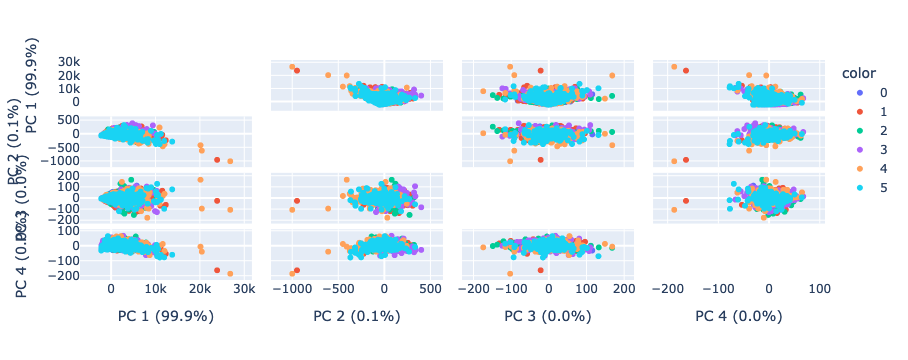

In [229]:
from sklearn.decomposition import PCA
filter_key = 'LAMP1'
filtered_features = list(filter(lambda x: filter_key in x,cell_features))

ordered_cell = cell_df.sort_values(
  by='Time', 
  ascending=True)
ordered_cell['Time']=ordered_cell['Time'].astype("string")
X = ordered_cell[filtered_features]

pca = PCA()
components = pca.fit_transform(X)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=ordered_cell["Time"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

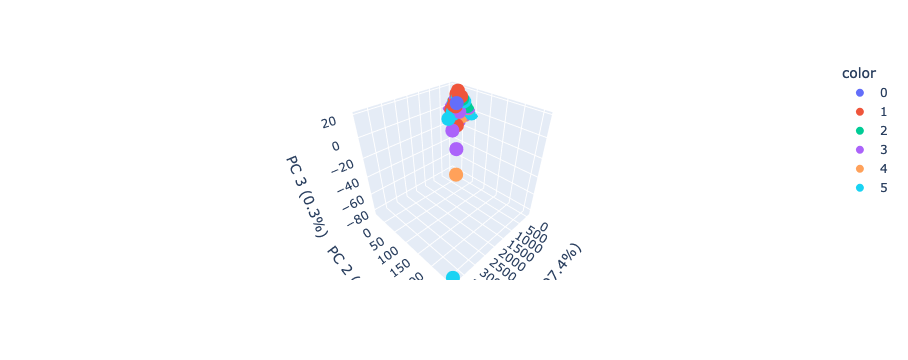

In [231]:
from sklearn.decomposition import PCA
filter_key = '_MitoTracker'
filtered_features = list(filter(lambda x: filter_key in x,cell_features))

ordered_cell = cell_df.sort_values(
  by='Time', 
  ascending=True)
ordered_cell['Time']=ordered_cell['Time'].astype("string")
X = ordered_cell[filtered_features]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

fig = px.scatter_3d(components, x=0, y=1,z=2, color=ordered_cell['Time'] , labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
})
fig.show()

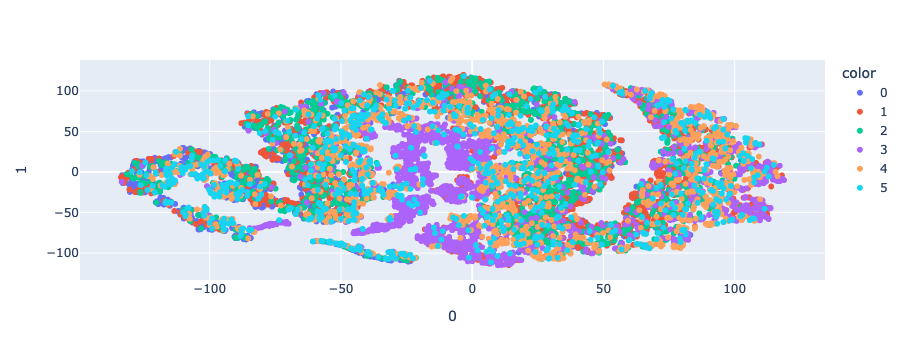

In [237]:
from sklearn.manifold import TSNE
filter_key = 'Entropy_LAMP1'
filtered_features = list(filter(lambda x: filter_key in x,cell_features))

ordered_cell = cell_df.sort_values(
  by='Time', 
  ascending=True)
ordered_cell['Time']=ordered_cell['Time'].astype("string")
X = ordered_cell[filtered_features]

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=ordered_cell['Time']
)
fig.show()

In [ ]:
ordered_nuc = nuclei_df.sort_values(
  by='Time', 
  ascending=True)

fig = px.box(ordered_nuc, x='AreaShape_MeanRadius', color = 'Time', labels={
                     "AreaShape_MeanRadius": "Mean Nuclear Radius",
                     'Time': 'Time Point'})

fig.show()

In [ ]:
fig = px.box(outlier_removal(cell_df,'AreaShape_MeanRadius'), x='AreaShape_MeanRadius', color = 'Time')
fig.update_yaxes(type='category')
fig.show()

# Pycytominer Testing: Use on single-cell profiles